<a href="https://colab.research.google.com/github/cete03/LAIDD/blob/main/%5B%EA%B9%80%ED%83%9C%EC%9D%80%5D_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 library 다운로드

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. 데이터 로드 (예: CSV 파일)
df = pd.read_csv("/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터/dilirank_qm.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      905 non-null    int64  
 1   SMILES          905 non-null    object 
 2   Severity Class  905 non-null    int64  
 3   vDILIConcern    905 non-null    object 
 4   hof             884 non-null    float64
 5   cosmo_area      884 non-null    object 
 6   cosmo_volume    884 non-null    object 
 7   homo            861 non-null    float64
 8   lumo            861 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 63.8+ KB


In [ ]:
pip install matplotlib seaborn

### 2. 데이터

본 노트북은 Google Drive에 저장된 `/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터/dilirank_qm.csv` 파일에서 데이터를 로드합니다. 이 코드를 실행하려면 해당 경로에 파일이 있는지 확인하거나, 파일 위치에 맞게 코드의 경로를 수정해야 합니다.

### 3. 코드 실행

노트북은 셀별로 순서대로 실행됩니다. 각 셀은 다음을 수행합니다.

- **필요 라이브러리 설치 및 임포트**: 필요한 파이썬 패키지를 설치하고 임포트합니다.
- **Google Drive 마운트**: Google Drive에서 데이터를 읽어오기 위해 Google Drive를 마운트합니다.
- **데이터 로드 및 확인**: CSV 파일을 Pandas DataFrame으로 로드하고 기본 정보를 확인합니다.
- **Severity Class 기반 모델 학습 및 평가**: 'Severity Class'를 타겟 변수로 사용하여 앙상블 모델을 학습 및 평가하고 결과를 시각화합니다.
- **vDILIConcern 기반 모델 학습 및 평가**: 'vDILIConcern'을 타겟 변수로 사용하여 앙상블 모델을 학습 및 평가하고 결과를 시각화합니다.

각 셀을 순서대로 실행하면 데이터 로드부터 모델 학습, 평가 및 결과 시각화까지 전체 프로세스가 진행됩니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      905 non-null    int64  
 1   SMILES          905 non-null    object 
 2   Severity Class  905 non-null    int64  
 3   vDILIConcern    905 non-null    object 
 4   hof             884 non-null    float64
 5   cosmo_area      884 non-null    object 
 6   cosmo_volume    884 non-null    object 
 7   homo            861 non-null    float64
 8   lumo            861 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 63.8+ KB


## Severity Class 기반 앙상블

--- Starting Model Training & Evaluation ---



/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


--- Performance of Random Forest ---
Accuracy: 0.6464
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         9
           3       0.56      0.77      0.65        56
           4       0.25      0.11      0.15         9
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        10
           8       0.65      0.80      0.72        30

    accuracy                           0.65       181
   macro avg       0.27      0.29      0.27       181
weighted avg       0.59      0.65      0.61       181

---------------------------------



/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


--- Performance of SVM ---
Accuracy: 0.6961
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        54
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         9
           3       0.57      0.96      0.72        56
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        10
           8       0.66      0.77      0.71        30

    accuracy                           0.70       181
   macro avg       0.24      0.29      0.26       181
weighted avg       0.57      0.70      0.62       181

-----------------------



/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:34:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


--- Performance of XGBoost ---
Accuracy: 0.6243
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         9
           3       0.54      0.71      0.62        56
           4       0.14      0.11      0.12         9
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        10
           8       0.68      0.77      0.72        30

    accuracy                           0.62       181
   macro avg       0.25      0.28      0.26       181
weighted avg       0.56      0.62      0.59       181

---------------------------



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


--- Performance of MLP ---
Accuracy: 0.6851
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        54
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         9
           3       0.56      0.89      0.69        56
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        10
           8       0.68      0.83      0.75        30

    accuracy                           0.69       181
   macro avg       0.25      0.29      0.26       181
weighted avg       0.58      0.69      0.62       181

-----------------------



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:34:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/tmp/ipython-input-3381438710.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette='viridis')


--- Performance of Ensemble (Soft Voting) ---
Accuracy: 0.6796
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         9
           3       0.56      0.88      0.69        56
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        10
           8       0.68      0.83      0.75        30

    accuracy                           0.68       181
   macro avg       0.24      0.29      0.26       181
weighted avg       0.57      0.68      0.61       181

------------------------------------------



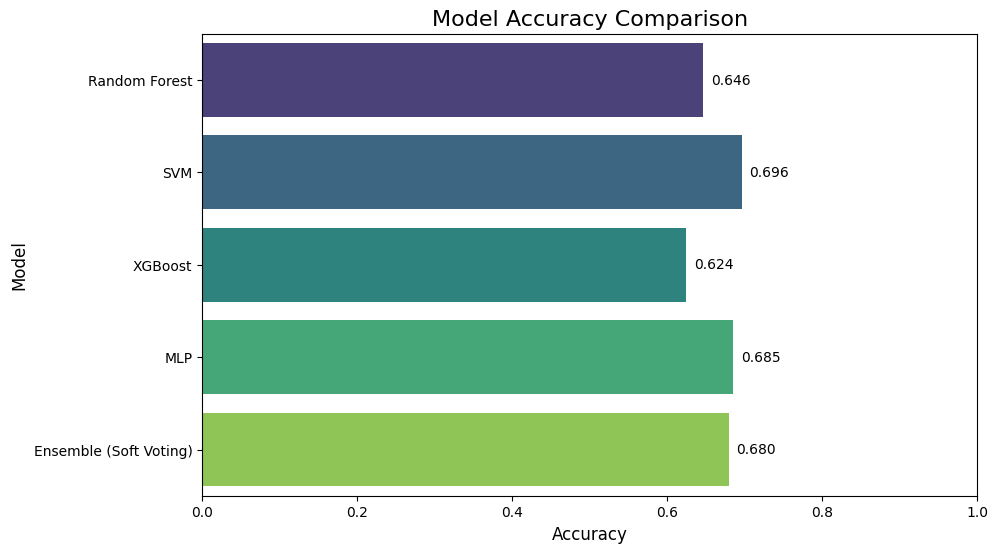

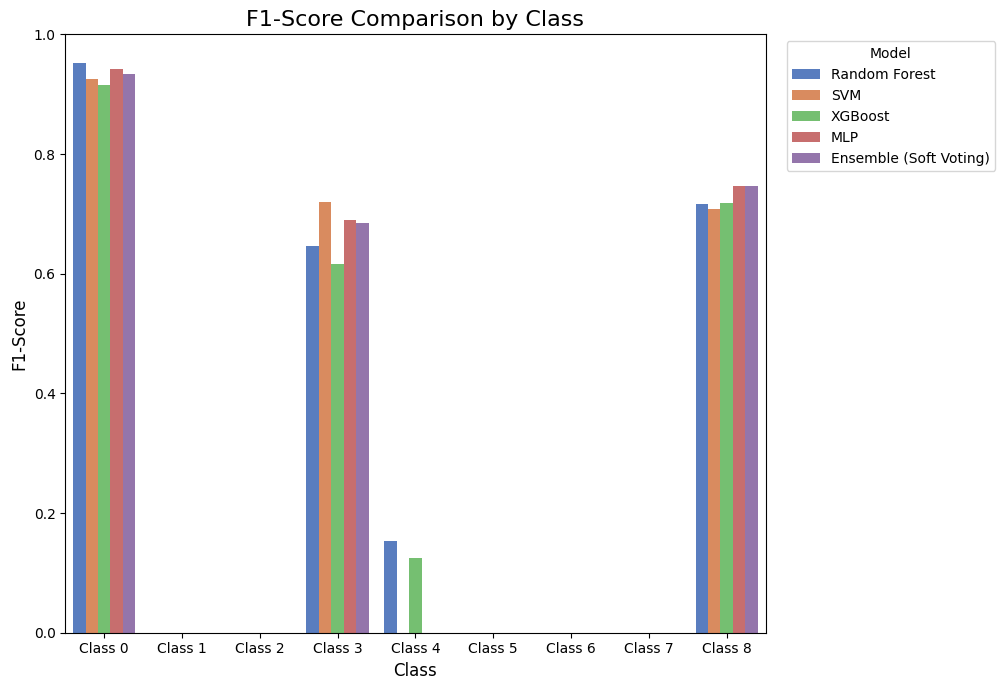

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


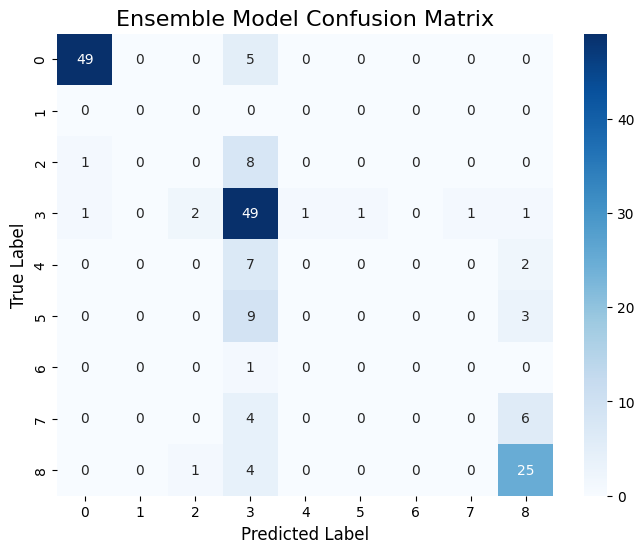

In [ ]:
# Required libraries (install if you haven't already)
# !pip install pandas scikit-learn xgboost matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Korean font settings are no longer needed, so they are commented out.
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False


# Scikit-learn module imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# --- 1. Load Data ---
df = pd.read_csv("/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터/dilirank_qm.csv")

# --- 2. Data Preprocessing ---
X = df.drop('Severity Class', axis=1)
y = df['Severity Class']
# Check if 'Unnamed: 0' or 'Unnamed:0' exists
if 'Unnamed: 0' in X.columns:
    X = X.drop(['Unnamed: 0', 'SMILES'], axis=1)
elif 'Unnamed:0' in X.columns:
    X = X.drop(['Unnamed:0', 'SMILES'], axis=1)

X['cosmo_area'] = pd.to_numeric(X['cosmo_area'], errors='coerce')
X['cosmo_volume'] = pd.to_numeric(X['cosmo_volume'], errors='coerce')

numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

# Define all possible labels and class names from the entire dataset before splitting
all_labels = sorted(y.unique())
class_names = [str(c) for c in all_labels]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. Define Models ---
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_svm = SVC(probability=True, random_state=42)
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
clf_mlp = MLPClassifier(max_iter=1000, random_state=42)

# --- 4. Create Ensemble Model ---
eclf = VotingClassifier(
    estimators=[('rf', clf_rf), ('svm', clf_svm), ('xgb', clf_xgb), ('mlp', clf_mlp)],
    voting='soft', weights=[1, 1, 1, 1])

models = {
    "Random Forest": clf_rf,
    "SVM": clf_svm,
    "XGBoost": clf_xgb,
    "MLP": clf_mlp,
    "Ensemble (Soft Voting)": eclf
}

# --- 5. Train and Evaluate Models ---
results = []
trained_pipelines = {}

print("--- Starting Model Training & Evaluation ---\n")
for name, model in models.items():
    final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    final_pipeline.fit(X_train, y_train)
    y_pred = final_pipeline.predict(X_test)

    report = classification_report(
        y_test, y_pred, labels=all_labels, target_names=class_names, output_dict=True, zero_division=0)

    results.append({'model': name, 'accuracy': report['accuracy'], 'report': report})
    trained_pipelines[name] = final_pipeline

    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- Performance of {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, labels=all_labels, target_names=class_names, zero_division=0))
    print("-" * (len(name) + 20) + "\n")

# --- 6. Visualize Results ---

# 1. Bar Chart for Model Accuracy Comparison
model_names = [r['model'] for r in results]
accuracies = [r['accuracy'] for r in results]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.0, 1.0)
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index, f'{value:.3f}', va='center')
plt.show()

# 2. Grouped Bar Chart for F1-Score Comparison by Class
f1_scores = []
for r in results:
    for cls_name in class_names:
        f1_scores.append({
            'model': r['model'],
            'class': f'Class {cls_name}',
            'f1_score': r['report'][cls_name]['f1-score']
        })

df_f1 = pd.DataFrame(f1_scores)

plt.figure(figsize=(12, 7))
sns.barplot(data=df_f1, x='class', y='f1_score', hue='model', palette='muted')
plt.title('F1-Score Comparison by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.ylim(0.0, 1.0)
plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# 3. Confusion Matrix for the Ensemble Model
ensemble_pipeline = trained_pipelines['Ensemble (Soft Voting)']
y_pred_ensemble = ensemble_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ensemble, labels=all_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Ensemble Model Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [ ]:
df['vDILIConcern'].unique()

array(['Ambiguous DILI-concern', 'vNo-DILI-Concern', 'vLess-DILI-Concern',
       'vMost-DILI-Concern'], dtype=object)

## vDILIConcern 기반 앙상블

Target classes have been encoded.
0: Ambiguous DILI-concern
1: vLess-DILI-Concern
2: vMost-DILI-Concern
3: vNo-DILI-Concern


--- Starting Model Training & Evaluation (Target: vDILIConcern) ---



/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


--- Performance of Random Forest ---
Accuracy: 0.6851
                        precision    recall  f1-score   support

Ambiguous DILI-concern       0.54      0.56      0.55        45
    vLess-DILI-Concern       0.47      0.40      0.43        50
    vMost-DILI-Concern       0.79      0.83      0.81        36
      vNo-DILI-Concern       0.91      0.98      0.94        50

              accuracy                           0.69       181
             macro avg       0.68      0.69      0.68       181
          weighted avg       0.67      0.69      0.68       181

---------------------------------



/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


--- Performance of SVM ---
Accuracy: 0.6409
                        precision    recall  f1-score   support

Ambiguous DILI-concern       0.37      0.16      0.22        45
    vLess-DILI-Concern       0.44      0.58      0.50        50
    vMost-DILI-Concern       0.78      0.86      0.82        36
      vNo-DILI-Concern       0.88      0.98      0.92        50

              accuracy                           0.64       181
             macro avg       0.61      0.64      0.61       181
          weighted avg       0.61      0.64      0.61       181

-----------------------



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:43:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


--- Performance of XGBoost ---
Accuracy: 0.6298
                        precision    recall  f1-score   support

Ambiguous DILI-concern       0.44      0.49      0.46        45
    vLess-DILI-Concern       0.43      0.36      0.39        50
    vMost-DILI-Concern       0.74      0.81      0.77        36
      vNo-DILI-Concern       0.90      0.90      0.90        50

              accuracy                           0.63       181
             macro avg       0.63      0.64      0.63       181
          weighted avg       0.62      0.63      0.63       181

---------------------------



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


--- Performance of MLP ---
Accuracy: 0.6740
                        precision    recall  f1-score   support

Ambiguous DILI-concern       0.50      0.47      0.48        45
    vLess-DILI-Concern       0.47      0.44      0.45        50
    vMost-DILI-Concern       0.79      0.83      0.81        36
      vNo-DILI-Concern       0.91      0.98      0.94        50

              accuracy                           0.67       181
             macro avg       0.67      0.68      0.67       181
          weighted avg       0.66      0.67      0.67       181

-----------------------



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:43:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/tmp/ipython-input-3391608585.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette='viridis')


--- Performance of Ensemble (Soft Voting) ---
Accuracy: 0.6796
                        precision    recall  f1-score   support

Ambiguous DILI-concern       0.51      0.53      0.52        45
    vLess-DILI-Concern       0.49      0.40      0.44        50
    vMost-DILI-Concern       0.77      0.83      0.80        36
      vNo-DILI-Concern       0.91      0.98      0.94        50

              accuracy                           0.68       181
             macro avg       0.67      0.69      0.68       181
          weighted avg       0.67      0.68      0.67       181

------------------------------------------



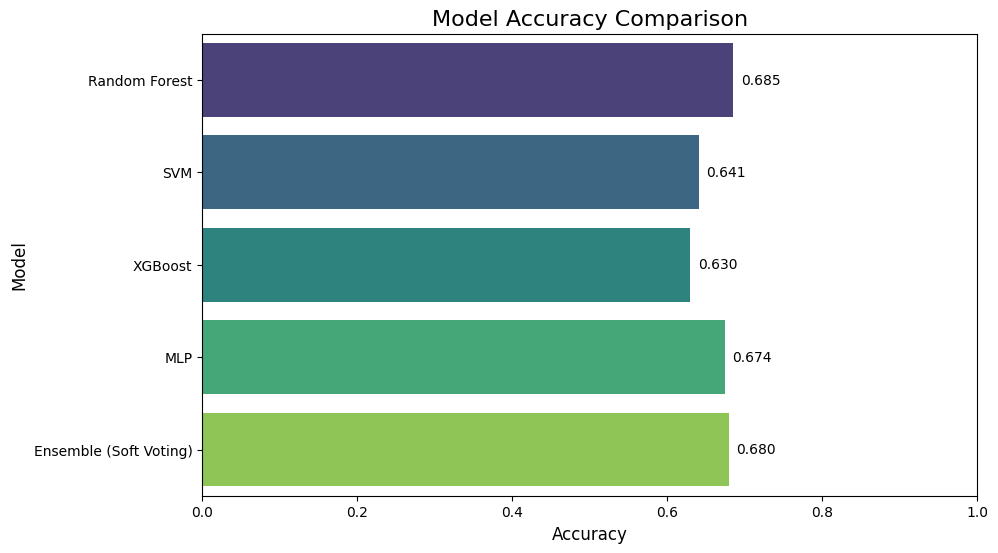

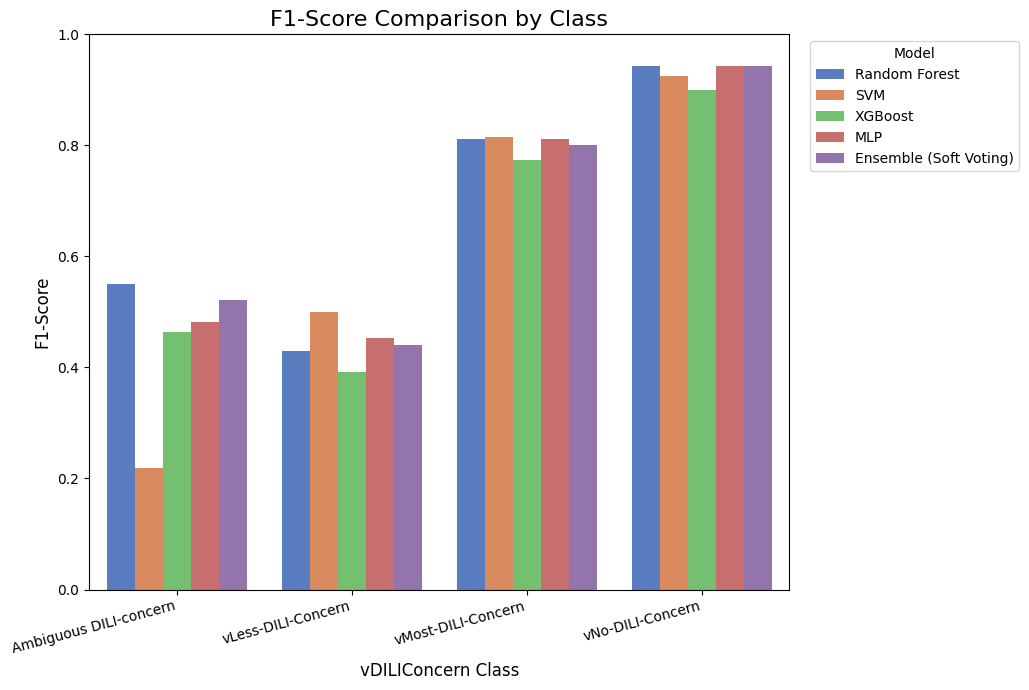

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['cosmo_area' 'cosmo_volume']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


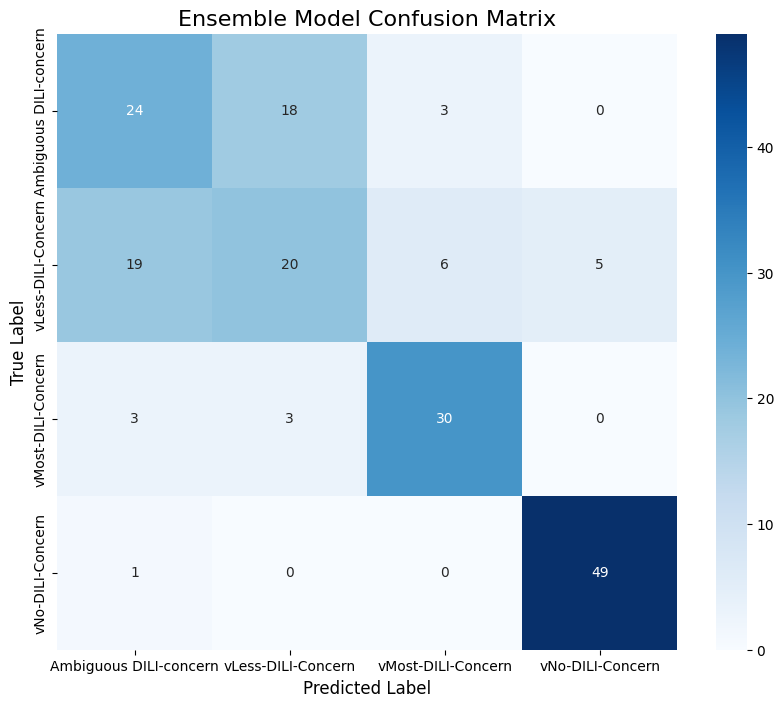

In [ ]:
# Required libraries (install if you haven't already)
# !pip install pandas scikit-learn xgboost matplotlib seaborn imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn module imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# --- 1. Load Data ---
df = pd.read_csv("/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터/dilirank_qm.csv")

# --- 2. Data Preprocessing ---

# #############################
# ### --- 수정된 부분 1: 타겟 변수 변경 --- ###
# #############################
# 타겟 변수 y를 'vDILIConcern'으로 설정합니다.
y = df['vDILIConcern']
# 피처 X에서 'vDILIConcern'을 제외합니다. 'Severity Class'는 이제 피처로 사용됩니다.
X = df.drop('vDILIConcern', axis=1)

# Check if 'Unnamed: 0' or 'Unnamed:0' exists and drop it
if 'Unnamed: 0' in X.columns:
    X = X.drop(['Unnamed: 0', 'SMILES'], axis=1)
elif 'Unnamed:0' in X.columns:
    X = X.drop(['Unnamed:0', 'SMILES'], axis=1)

# --- Label Encoding for the Target Variable ---
# 문자열 타겟을 숫자로 변환합니다 (e.g., 'Ambiguous...' -> 0, 'vNo...' -> 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_  # 실제 클래스 이름 저장 (e.g., ['Ambiguous DILI-concern', ...])
all_labels = np.arange(len(class_names)) # 숫자 라벨 저장 (e.g., [0, 1, 2, 3])
print(f"Target classes have been encoded.")
for i, name in enumerate(class_names):
    print(f"{i}: {name}")
print("\n")


# --- Feature Preprocessing ---
X['cosmo_area'] = pd.to_numeric(X['cosmo_area'], errors='coerce')
X['cosmo_volume'] = pd.to_numeric(X['cosmo_volume'], errors='coerce')

# 'vDILIConcern'이 X에서 빠졌으므로, 이제 범주형 피처는 자동으로 올바르게 선택됩니다.
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])


# #############################
# ### --- 수정된 부분 2: 분할 시 인코딩된 y 사용 --- ###
# #############################
# Split data into training and test sets using the encoded target
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# --- 3. Define Models ---
# 데이터 불균형 문제를 완화하기 위해 class_weight='balanced' 옵션을 추가하는 것을 권장합니다.
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_svm = SVC(probability=True, random_state=42, class_weight='balanced')
# XGBoost는 scale_pos_weight 파라미터로 가중치를 조절하지만, 다중 클래스에서는 복잡하므로 여기서는 기본으로 둡니다.
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
clf_mlp = MLPClassifier(max_iter=1000, random_state=42)

# --- 4. Create Ensemble Model ---
eclf = VotingClassifier(
    estimators=[('rf', clf_rf), ('svm', clf_svm), ('xgb', clf_xgb), ('mlp', clf_mlp)],
    voting='soft')

models = {
    "Random Forest": clf_rf,
    "SVM": clf_svm,
    "XGBoost": clf_xgb,
    "MLP": clf_mlp,
    "Ensemble (Soft Voting)": eclf
}

# --- 5. Train and Evaluate Models ---
results = []
trained_pipelines = {}

print("--- Starting Model Training & Evaluation (Target: vDILIConcern) ---\n")
for name, model in models.items():
    final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    final_pipeline.fit(X_train, y_train)
    y_pred = final_pipeline.predict(X_test)

    report = classification_report(
        y_test, y_pred, labels=all_labels, target_names=class_names, output_dict=True, zero_division=0)

    results.append({'model': name, 'accuracy': report['accuracy'], 'report': report})
    trained_pipelines[name] = final_pipeline

    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- Performance of {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, labels=all_labels, target_names=class_names, zero_division=0))
    print("-" * (len(name) + 20) + "\n")

# --- 6. Visualize Results ---

# 1. Bar Chart for Model Accuracy Comparison
model_names = [r['model'] for r in results]
accuracies = [r['accuracy'] for r in results]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.0, 1.0)
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index, f'{value:.3f}', va='center')
plt.show()

# 2. Grouped Bar Chart for F1-Score Comparison by Class
f1_scores = []
for r in results:
    for cls_name in class_names:
        f1_scores.append({
            'model': r['model'],
            'class': cls_name,  # Use the actual class name
            'f1_score': r['report'][cls_name]['f1-score']
        })

df_f1 = pd.DataFrame(f1_scores)

plt.figure(figsize=(12, 7))
sns.barplot(data=df_f1, x='class', y='f1_score', hue='model', palette='muted')
plt.title('F1-Score Comparison by Class', fontsize=16)
plt.xlabel('vDILIConcern Class', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(rotation=15, ha='right') # Rotate class names for better readability
plt.ylim(0.0, 1.0)
plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# 3. Confusion Matrix for the Ensemble Model
ensemble_pipeline = trained_pipelines['Ensemble (Soft Voting)']
y_pred_ensemble = ensemble_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ensemble, labels=all_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Ensemble Model Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()